# The Dataset

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import fashion_mnist
np.random.seed(123)

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)


In [3]:
# A function plotting an image from the Fashion MNIST dataset with its corresposnding label
# img_data: an array of images/2D matrices (X)
# label_ids: an array of labels from 0 to 9 matching in order to the images array (y)
# index: array index of the image to be plotted
def plot_fashion_label(img_data, label_ids, index):
    labels = ['T-shirt/top','Trouser', 'Pullover', 'Dress', 
              'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    plt.imshow(img_data[index], cmap='gray')
    plt.title(labels[label_ids[index]])
    return labels[label_ids[index]]

'T-shirt/top'

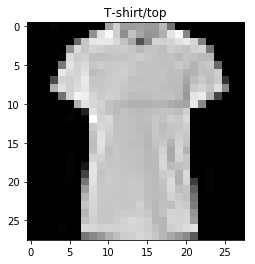

In [4]:
# test plot
plot_fashion_label(X_train, y_train, index=np.random.randint(0,100))

# A first neural network

In [10]:
import numpy as np
from sklearn.datasets import make_classification
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Conv1D, Dropout
from keras.models import Model
from keras.optimizers import SGD

def one_hot(n_classes, y):
    return np.eye(n_classes)[y]

def plot_decision_boundary(clf, X, y, title=None):
    h = .1  # step size in the mesh

    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    fig, ax = plt.subplots()
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    xx.shape
    
    
    # Put the result into a color plot
    Z = Z[:,0].reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.PuOr)
#     ax.axis('off')
    ax.scatter(X[:, 0], X[:, 1], c=Y_[:,0], cmap=plt.cm.PuOr)
    if title is not None:
        ax.set_title(title)
        
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)


- ### Sample with 2 classes

In [11]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=2, random_state=123)
# plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
#             s=50, cmap=plt.cm.PuOr)

Model Loss: 0.257,    Model Accuracy: 0.870


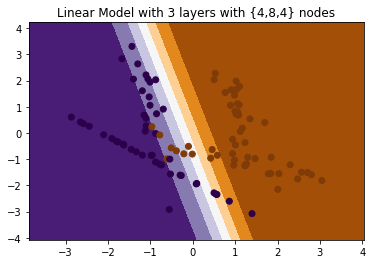

In [12]:
np.random.seed(123+3)

Y_ = one_hot(2, y)

# This returns a tensor to represent the input
inputs = Input(shape=(2,))

# Build a NN with 3 layers with {4,8,4} nodes each
x1 = Dense(4)(inputs)
x2 = Dense(8)(x1)
x3 = Dense(4)(x2)

# Merge results into a final layer with dimension 2 matching the number of output classes
predictions = Dense(2, activation='softmax')(x3)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)
model.compile(loss='categorical_crossentropy',
              optimizer= sgd,
              metrics=['accuracy'])
model.fit(X, Y_, epochs=100, verbose=False)
loss, acc = model.evaluate(X, Y_, verbose=0)
print('Model Loss: {:0.3f},    Model Accuracy: {:0.3f}'.format(loss, acc))
plot_decision_boundary(model, X, Y_, title='Linear Model with 3 layers with {4,8,4} nodes')

Model Loss: 0.102,    Model Accuracy: 0.970


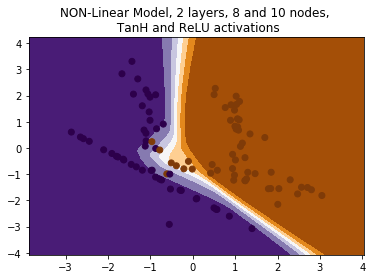

In [13]:
# This returns a tensor to represent the input
inputs = Input(shape=(2,))

# Build a NN with 2 layers with 8 nodes each
x1 = Dense(8)(inputs)        # a dense layer with 8 nodes
x1 = Activation("tanh")(x1)  # apply activation functoion on the outputs from the previous layer
x1 = Dropout(0.2)(x1)        # set outputs after activation to zero if their value is less than the threshold (0.2)
x2 = Dense(10)(x1)           # add a new layer with 10 nodes using the leftovers from the prevoius layers
x2 = Activation("relu")(x2)  # repeat activation and cutoff of results
x2 = Dropout(0.2)(x2)        # repeat activation and cutoff of results

# Merge results into a final layer with dimension 2 matching the number of output classes
predictions = Dense(2, activation='softmax')(x2)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)
model.compile(loss='categorical_crossentropy',
              optimizer= sgd,
              metrics=['accuracy'])
model.fit(X, Y_, epochs=100, verbose=False)
loss, acc = model.evaluate(X, Y_, verbose=0)
print('Model Loss: {:0.3f},    Model Accuracy: {:0.3f}'.format(loss, acc))
plot_decision_boundary(model, X, Y_, title='NON-Linear Model, 2 layers, 8 and 10 nodes, \n TanH and ReLU activations')

Due to the complex structure of the data, in order to classify it better, the layers in the network should include nonlinear relation between the input parameters. To achieve this one needs to use nonlinear activation functions. In order to avoid overfitting, a Dropout condition is added as well on some layers.

- ### Circles

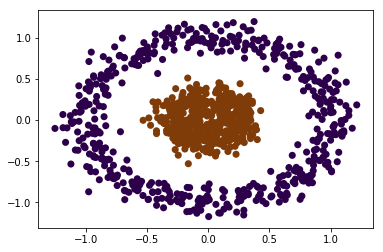

In [14]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(n_samples=1000, factor=.25, noise=.1)
labels = [0, 1]
y = np.take(labels, (y < 0.5))
plt.scatter(X[:, 0], X[:, 1], c=y, lw=0, s=50, cmap=plt.cm.PuOr)

In [15]:
activations = {'softmax', 'tanh', 'relu'}
loss_funcs = {'binary_crossentropy', 'categorical_crossentropy', 
          'mean_squared_error'}
n_layers = range(5)
cutoff = [0.1, 0.2, 0.5]